<a href="https://colab.research.google.com/github/heduardabolini/trab/blob/main/Trabalho01_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

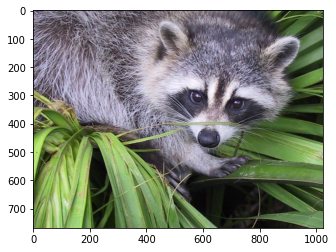

In [ ]:
# exemplo de código
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
 
image = misc.face()
plt.imshow(image)
plt.show()

# 1. Extração de Região de Interesse (ROI)

Crie uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

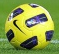


Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

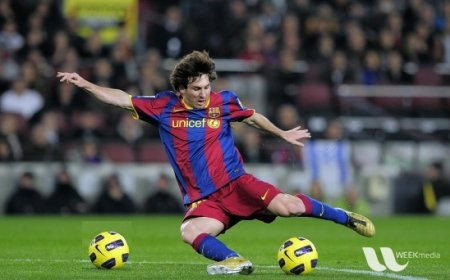

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Corte da Bola


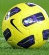

 
Imagem


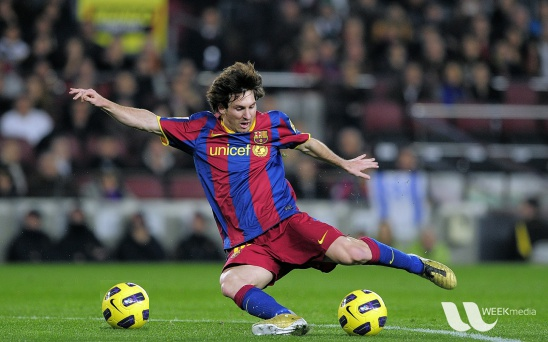

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#carregando a imagem
imagem = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/messi.jpg")
#imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#definindo a função que corta a imagem
def crop (img, x, y, altura, largura):
    crop_imagem = imagem[y:y+altura, x:x+largura]
    return crop_imagem

#definindo a função que cola a imagem menor na imagem maior
def paste(src, dst, x, y):
    (a, b, c) = dst.shape
    f1 = a+x
    f2 = b+y
    src[x:f1, y:f2] = dst
    return src;


corte = crop (imagem, 336, 287, 163, 49)
cola = paste(imagem, corte, 280, 100)
print("Corte da Bola")
cv2_imshow(corte)
print(" ")
print("Imagem")
cv2_imshow(imagem)

#2. Trabalhando com Canais de Cores

Crie um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

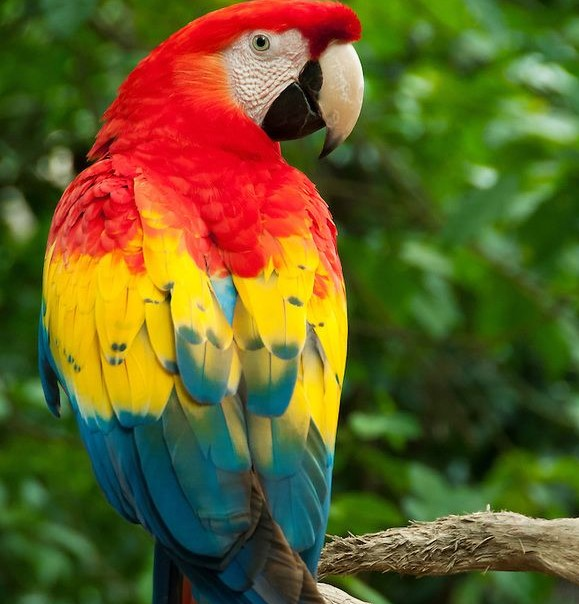

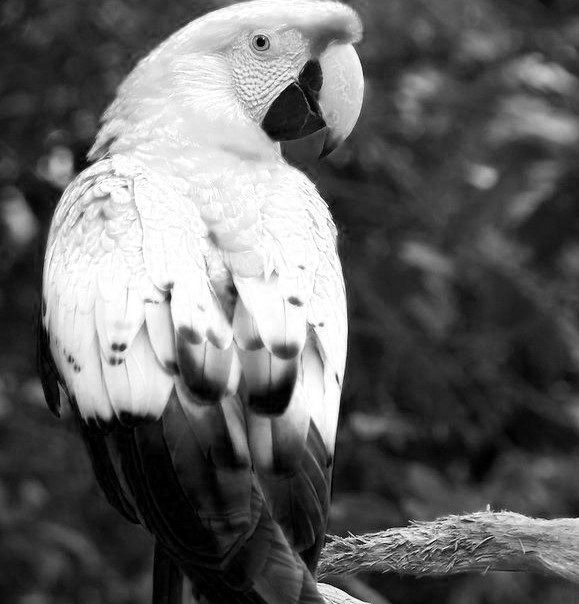

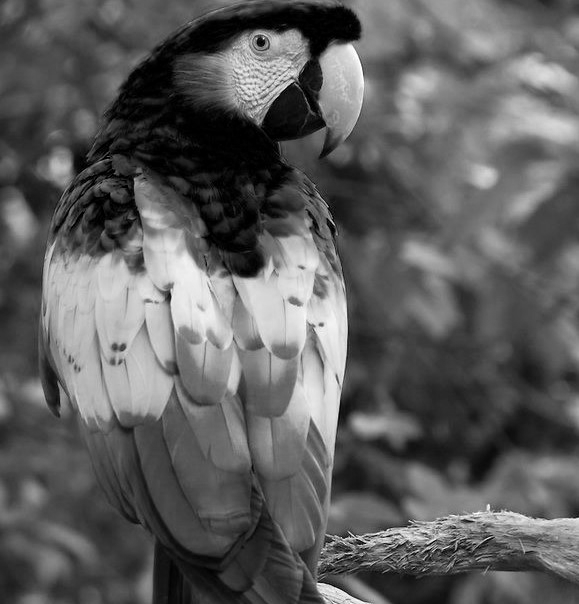

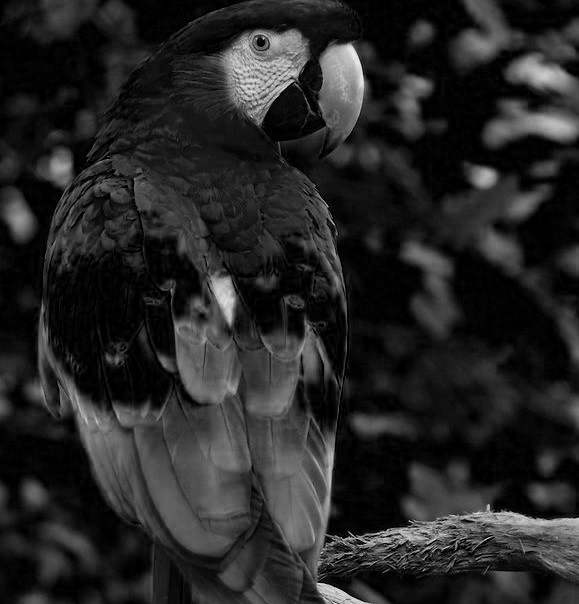

['azul', 'verde', 'vermelha'] [37.921953813951895, 93.68765798533667, 100.31468963387434]
A cor que mais predomina na imagem é  vermelha com a média de cor  100.31468963387434


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


soma_b = 0.0
soma_g = 0.0
soma_r = 0.0

imagem = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/arara.jpg")

altura, largura, _ = imagem.shape

#separando o RGB
(canalAzul, canalVerde, canalVermelho) = cv2.split(imagem)

cv2_imshow(imagem)
cv2_imshow(canalVermelho)
cv2_imshow(canalVerde)
cv2_imshow(canalAzul)

#percorrendo a imagem e separando os pixels de cada canal
for i in range(0,altura):
	for j in range(0,largura):
		
		soma_b+=canalAzul[i,j]
		soma_g+=canalVerde[i,j]
		soma_r+=canalVermelho[i,j]

#criando vetores
media=np.zeros(3)	
bgr=np.zeros(3)

#fazendo a média
bgr=["azul", "verde", "vermelha"]
media=[soma_b/(altura*largura), soma_g/(altura*largura), soma_r/(altura*largura)]
print(bgr, media)

#procurando o maior
maior = 0
j = 0
while j < 3 :

	if media[j] >= media[maior]:
	    maior = j
	j = j + 1

print("A cor que mais predomina na imagem é ",bgr[maior], "com a média de cor ",media[maior])




# 3. Junte pessoas usando Alpha Blending

No vídeo abaixo é feito uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. A técnica utilizada é de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

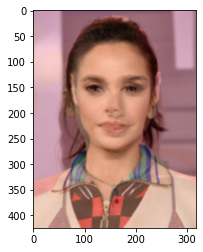

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#carregando as duas imagens
foto1 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/fig1.jpg")
foto2 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/fig2.jpg")
foto1 = cv2.cvtColor(foto1, cv2.COLOR_BGR2RGB)
foto2 = cv2.cvtColor(foto2, cv2.COLOR_BGR2RGB)


#fazendo com que as duas imagens tenham as mesma dimensões
altura, largura, _ = foto1.shape
foto2 = cv2.resize(foto2, (largura, altura))

#fazendo a "fusão"
result = cv2.addWeighted(foto1, 0.5, foto2, 0.5, 0) #soma das duas imagens

#reduzindo o tamanho da imagem
alturaresult, larguraresult,_= result.shape
result = cv2.resize(result, (int(larguraresult*0.25), int(alturaresult*0.25)) )

#suavizando a imagem
result = cv2.GaussianBlur(result,(5,5),0)

#leitura
plt.imshow(result)

#4. Histograma de Cores

Nos vídeos abaixo, é discutido o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

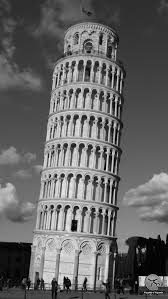

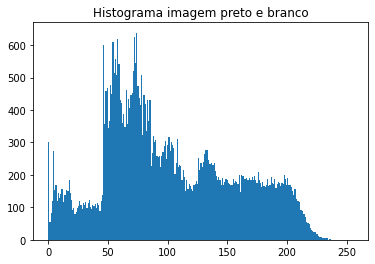

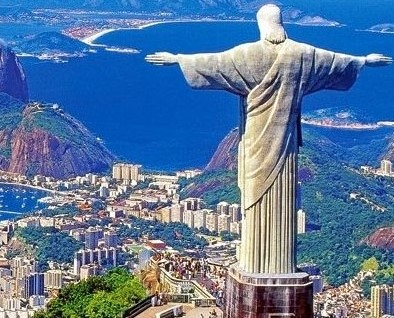

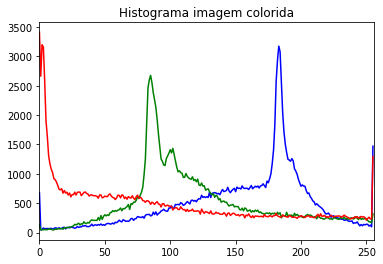

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
 
#carregando imagem preto e branco
img = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/torrePisa.jpg", 0)
 
#carregando imagem colorida
imagem = cv2.imread ("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/CristoRedentor.jpg")
 
#HISTOGRAMA PRETO E BRANCO
#plotando o histograma preto e branco
plt.hist(img.ravel(), 256, [0, 255]) #ravel pega a matriz 2D  e linha a linha forma vetor de uma dimensão
 
cv2_imshow(img)
#mostrando o histograma da imagem preto e branco
plt.title('Histograma imagem preto e branco')
plt.show()
 
#HISTOGRAMA COLORIDO
#criando uma lista para fazer o histograma de cada canal
color = ('b', 'g', 'r')
 
for i, col in enumerate (color):
 
  #definindo o histograma
  histograma = cv2.calcHist([imagem], [i], None, [256], [0, 256]) #(imagem, identificador, máscara, bin, intervalo de tom)
  plt.plot(histograma, color = col)
  plt.xlim([0, 256])
 
cv2_imshow(imagem)
#mostrando o histograma da imagem colorida
plt.title('Histograma imagem colorida')
plt.show()
 
 
cv2.waitKey(0)
cv2.destroyAllWindows()

#5. Adição de Imagens

No vídeo abaixo, é apresentada uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

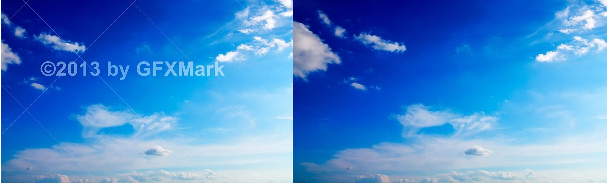

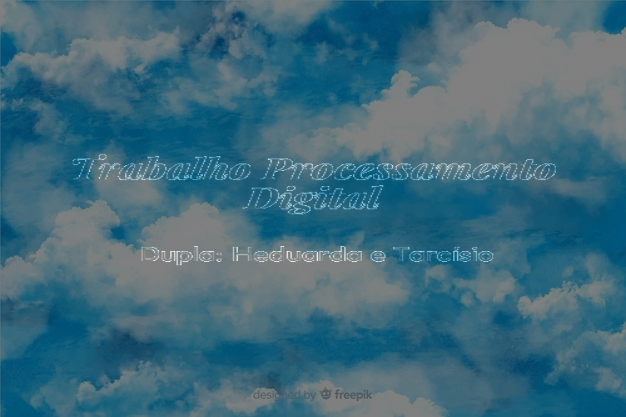

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#função para fazer a soma de duas imagens
def somandoImagem():

  #carregando as duas imagens
  imagem1 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/nuvem.jpg")
  imagem2 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/marca.png")
 
  #garantindo que as duas imagens tenham as mesmas dimensões
  h, w, _ = imagem1.shape
  imagem2 = cv2.resize(imagem2, (w, h))

  #soma ponderada de duas imagens
  addedImage = cv2.addWeighted(imagem1, 0.5, imagem2, 0.5, 0)
  return addedImage

soma = somandoImagem()
cv2_imshow(soma)


#6. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

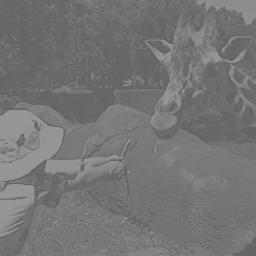

Imagem Original 


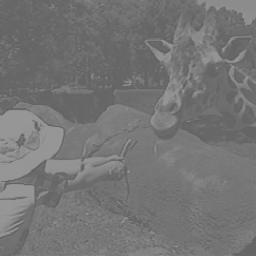

 
Imagem Equalizada 


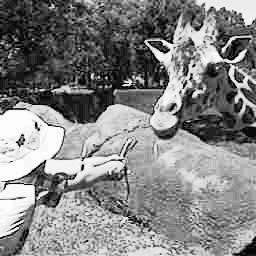

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
 
#carregando a imagem
img = cv2.imread('/content/drive/MyDrive/ProcessamentoDigitaldeImagens/fig6.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#equalizando a imagem
h_eq = cv2.equalizeHist(img)

print("Imagem Original ")
cv2_imshow(img)
print(" ")
print("Imagem Equalizada ")
cv2_imshow(h_eq)
 
plt.show()

#7. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

Métricas de comparação S1 E S2
Correlação:  0.08020703582587368
Chi-Square:  1623.2860526834172
Bhattacharrya:  0.739660211588951

Métricas de comparação S1 E D1
Correlação::  0.3977096449154344
Chi-Square:  3949.1711531329497
Bhattacharrya:  0.5345638252529107

Métricas de comparação S1 E D2
Correlação::  0.07123154021245982
Chi-Square:  17540.227374999933
Bhattacharrya:  0.8144283253731756

Métricas de comparação S1 E D3
Correlação::  0.046324483580686575
Chi-Square:  25908.563031343798
Bhattacharrya: s 0.809761328398854



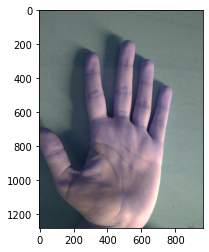

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import *
 
#carregando as imagens e transformando para HSV
s1 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/7/s1.jpg")
s2 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/7/s2.jpg")
d1 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/7/d1.jpg")
d2 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/7/d2.jpg")
d3 = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/7/d3.jpg")
hsvS1 = cv2.cvtColor(s1, cv2.COLOR_BGR2HSV)
hsvS2 = cv2.cvtColor(s2, cv2.COLOR_BGR2HSV)
hsvD1 = cv2.cvtColor(d1, cv2.COLOR_BGR2HSV)
hsvD2 = cv2.cvtColor(d2, cv2.COLOR_BGR2HSV)
hsvD3 = cv2.cvtColor(d3, cv2.COLOR_BGR2HSV)
 
#definindo a função que vai comparar os histograma
def comparacao_histograma (hsv_S1, hsv_img):
  
  h_bins = 50
  s_bins = 60
  histSize = [h_bins, s_bins]
 
  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges 
 
  channels = [0, 1]
 
  #calculando os histogramas e suas normalizações
  hist_S1 = cv2.calcHist([hsv_S1], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_S1, hist_S1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  
  hist_img = cv2.calcHist([hsv_img], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_img, hist_img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  
  #comparação entre s1 e as imagens usando as metricas
  img = np.zeros(4)
  for metricas in range(4):
    img[metricas] = cv2.compareHist(hist_S1, hist_img, metricas)
  
  return img;
 
#definindo a função que calcula a soma das distancias
def soma(compareHist):
  return sqrt((compareHist[0]*compareHist[0])+(compareHist[1]*compareHist[1])+(compareHist[3]*compareHist[3]))
 
#definindo a função que verifica a distância
def distancias(distancia):
  return distancia.min()
 
#comparando os histograms e mostrando as métricacs de comparação na tela
comparandoS1S2 = comparacao_histograma(s1, s2)
print("Métricas de comparação S1 E S2")
print("Correlação: ", comparandoS1S2 [0])
print("Chi-Square: ", comparandoS1S2 [1])
print("Bhattacharrya: ",comparandoS1S2 [3])
print("")
 
comparandoS1D1 = comparacao_histograma(s1, d1)
print("Métricas de comparação S1 E D1")
print("Correlação:: ", comparandoS1D1 [0])
print("Chi-Square: ", comparandoS1D1[1])
print("Bhattacharrya: ", comparandoS1D1[3])
print("")
 
comparandoS1D2 = comparacao_histograma(s1, d2)
print("Métricas de comparação S1 E D2")
print("Correlação:: ", comparandoS1D2 [0])
print("Chi-Square: ", comparandoS1D2[1])
print("Bhattacharrya: ", comparandoS1D2[3])
print("")
 
comparandoS1D3 = comparacao_histograma(s1, d3)
print("Métricas de comparação S1 E D3")
print("Correlação:: ", comparandoS1D3[0])
print("Chi-Square: ", comparandoS1D3[1])
print("Bhattacharrya: s", comparandoS1D3[3])
print("")
 
#calculando as distâncias
distancia = np.zeros(4)
distancia[0] = soma(comparandoS1S2)
distancia[1] = soma(comparandoS1D1)
distancia[2] = soma(comparandoS1D2)
distancia[3] = soma(comparandoS1D3)
 
menor = distancias(distancia)
 
#verificando qual imagem é mais parecida com S1
if(menor == distancia[0]):
    plt.imshow(s2)
elif (menor == distancia[1]):
    plt.imshow(d1)
elif (menor == distancia[2]):
    plt.imshow(d2)
else:
    plt.imshow(d3)

#8. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [ ]:
#O código roda normalmente no terminal realizando a ação desejada

import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob

#abrindo a captura de vídeo
captura = cv2.VideoCapture("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/video.mp4")

#executando até o usuário fechar
while (True):
	#lendo cada quadro do vídeo e carregando em frame
	ret,frame = captura.read()

	#transformando o frame em HSV
	hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
	
	#intervalo de cor
	lowerBlue = np.array([100, 10, 10]) #valores mínimos
	upperBlue = np.array([160, 255, 255]) #valores máximos

	#identificação da área
	mascara = cv2.inRange(hsvFrame, lowerBlue, upperBlue)

	#pegando o contorno
	contorno, hierarchy = cv2.findContours(mascara, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	if(contorno):
		maiorArea = cv2.contourArea(contorno[0])
		contornoMaior = 0
		j=0
		#pegando o contorno com a maior área
		for i in contorno:
			if maiorArea < cv2.contourArea(i):
				maiorArea = cv2.contourArea(i)
				contornoMaior = j
			j = j+1

		#calculando o retângulo
		x, y, w, h = cv2.boundingRect(contorno[contornoMaior])

		#fazendo o retângulo
		cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255),3)
		#fazendo o contorno do objeto
		cv2.drawContours(frame, [contorno[contornoMaior]], 0, (0,255,0), 3)
  
    cv2.imshow("Rastreamento",frame)

		if cv2.waitKey(25) & 0xFF == ord('q'):
			break

cv2.destroyAllWindows()



IndentationError: ignored

#9. Limiarização de Imagens

Nos vídeos abaixo, é discutido o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
#A imagem não é mostrada pois o exercício solicita uma janela X, e o Window System não está disponível no Colab

import numpy as np
import cv2
import time
from matplotlib import pyplot as plt

#variável, tabela ASCII associa um número a uma tecla
ESC = 27

limiar_antes =0
contador = 0
atualizado = False


#carregando a imagem
imagem = cv2.imread("/content/drive/MyDrive/ProcessamentoDigitaldeImagens/Lenna.png",0)

#criando uma janela gráfica
janela = "Limiarizador com trackbar"
cv2.namedWindow(janela)

#método de alteração dos valores
def onChange(value):
	pass 

#criando trackbar (barra)
cv2.createTrackbar("Limiar", janela, 0, 255, onChange) #(nome, associação com a janela, valor inicial, valor maximo, chamada do método)

#mostrando a imagem na janela, até o usuário fechar
while True:

	#valor do trackbar naquele instante
	limiar = cv2.getTrackbarPos("Limiar", janela)

	#verificando se houve alteração da limiarização pelo usuário
	if limiar_antes != limiar:
		atualizado = True
		contador = time.time()
		limiar_antes = limiar


	#atualizando o contraste da imagem, se tiver 1 segundo desde que o usuário atualizou o trackbar
	if atualizado == True and (time.time() - contador) > 1:

		#adapativeThreshold pois a imagem pode ter diferentes condições de iluminação
		imagem = cv2.adaptiveThreshold(imagem, limiar, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
		atualizado = False

	cv2.imshow(janela, imagem)

	#fechando a imagem com ESC
	tecla = cv2.waitKey(1) & 0xFF
	if tecla == ESC:
		break
cv2.destroyAllWindows()




#10. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>


Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

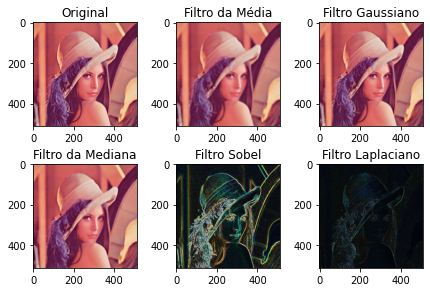

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#carregando a imagem e convertendo para RGB
imagem = cv2.imread('/content/drive/MyDrive/ProcessamentoDigitaldeImagens/Lenna.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#definição da função que aplica os filtros na imagem
def filtragem (imagem,filtro):

	if (filtro == "Filtro da Média"):
		imgFiltrada = cv2.blur(imagem,(7,7))
	elif (filtro == "Filtro Gaussiano"):
		imgFiltrada = cv2.GaussianBlur(imagem,(5,5),0)
	elif (filtro == "Filtro da Mediana"):
		imgFiltrada = cv2.medianBlur(imagem,7)
	elif (filtro == "Filtro Sobel"):
		sobelX = cv2.Sobel(imagem, cv2.CV_64F, 1, 0)
		sobelY = cv2.Sobel(imagem, cv2.CV_64F, 0, 1)
		sobelX = np.uint8(np.absolute(sobelX))
		sobelY = np.uint8(np.absolute(sobelY))
		imgFiltrada = cv2.bitwise_or(sobelX,sobelY)
	elif (filtro == "Filtro Laplaciano"):
		imgFiltrada = cv2.Laplacian(imagem,cv2.CV_64F)
		imgFiltrada =np.uint8(np.absolute(imgFiltrada))
	return imgFiltrada

#chamando a função filtragem
F1=filtragem(imagem,"Filtro da Média")
F2=filtragem(imagem,"Filtro Gaussiano")
F3=filtragem(imagem,"Filtro da Mediana")
F4=filtragem(imagem,"Filtro Sobel")
F5=filtragem(imagem,"Filtro Laplaciano")

#convertendo as imagens para inteiro (código estava dando erro sem essa conversão)
f1=F1.astype('uint8')
f2=F2.astype('uint8')
f3=F3.astype('uint8')
f4=F4.astype('uint8')
f5=F5.astype('uint8')

#definição da função que faz o grid das imagens
def showMultipleImageGrid(imgsArray,titlesArray,x,y):

	fig, axis = plt.subplots(y,x)
	xId, yId, titleId = 0,0,0

	for img in imgsArray:
	    axis[yId, xId].set_title(titlesArray[titleId])
	    axis[yId, xId].imshow(img)
	    if(len(titlesArray[titleId]) == 0):
	        axis[yId, xId].axis('off')

	    titleId += 1
	    xId += 1
	    if xId == x:
	        xId = 0
	        yId += 1

	fig.tight_layout(pad=0.5)
	plt.show()

#definição da função para plotar as imagens
def plotarimagens():
	#colocando todas as imagens obtidas em um vetor
	imgsArray = [imagem,f1,f2,f3,f4,f5]
	titlesArray = ['Original','Filtro da Média', 'Filtro Gaussiano', 'Filtro da Mediana', 'Filtro Sobel', 'Filtro Laplaciano']
	showMultipleImageGrid(imgsArray,titlesArray,3,2)

def main():
	plotarimagens()

if __name__ == "__main__":
    main()

	


